# Exemplo de uso do groupby

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = {
    'data_compra': ['2023-01-05', '2023-02-12', '2023-02-18', '2023-03-03', '2023-03-12', '2023-04-08'],
    'categoria': ['Eletrônicos', 'Roupas', 'Roupas', 'Eletrônicos', 'Acessórios', 'Eletrônicos']
}

df = pd.DataFrame(data)
df['data_compra'] = pd.to_datetime(df['data_compra'])

In [9]:
grouped = df.groupby([df['data_compra'].dt.month, 'categoria']).size().reset_index(name='num_compras')

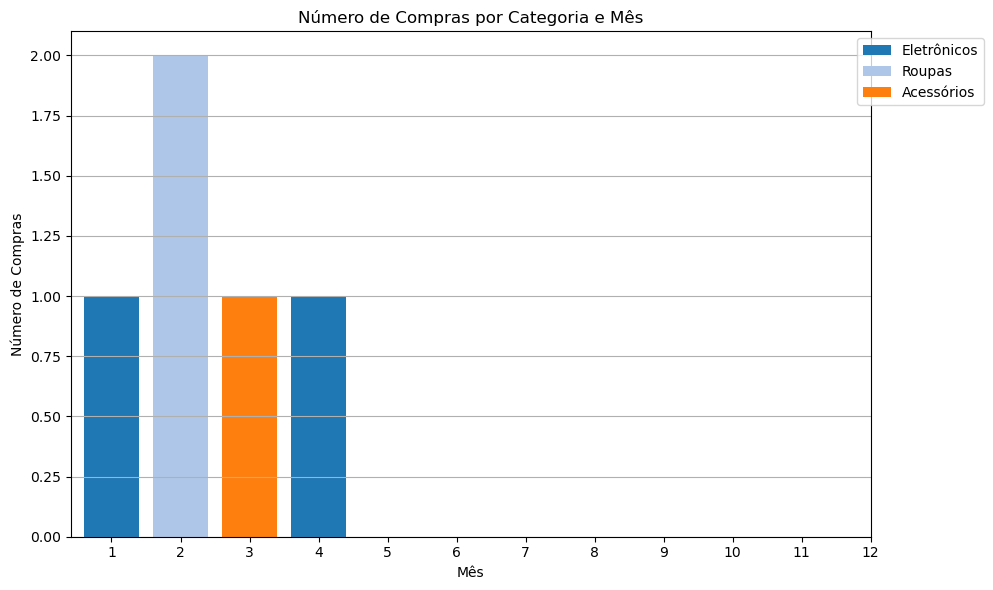

In [10]:
plt.figure(figsize=(10, 6))
categorias = grouped['categoria'].unique()
cores = plt.cm.tab20.colors

for i, cat in enumerate(categorias):
    dados_categoria = grouped[grouped['categoria'] == cat]
    plt.bar(dados_categoria['data_compra'], dados_categoria['num_compras'], color=cores[i], label=cat)

plt.xlabel('Mês')
plt.ylabel('Número de Compras')
plt.title('Número de Compras por Categoria e Mês')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(range(1, 13), [str(mes) for mes in range(1, 13)])  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Outro exemplo - com 3 variáveis

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
data = {
    'data_compra': ['2023-01-05', '2023-02-12', '2023-02-18', '2023-03-03', '2023-03-12', '2023-04-08'],
    'categoria': ['Eletrônicos', 'Roupas', 'Roupas', 'Eletrônicos', 'Acessórios', 'Eletrônicos'],
    'produto': ['Smartphone', 'Camiseta', 'Calça', 'Tablet', 'Bolsa', 'Notebook'],
    'quantidade': [2, 1, 3, 1, 2, 1]
}

df = pd.DataFrame(data)
df['data_compra'] = pd.to_datetime(df['data_compra'])


In [21]:
grouped = df.groupby([df['data_compra'].dt.month, 'categoria', 'produto'])['quantidade'].sum().reset_index()


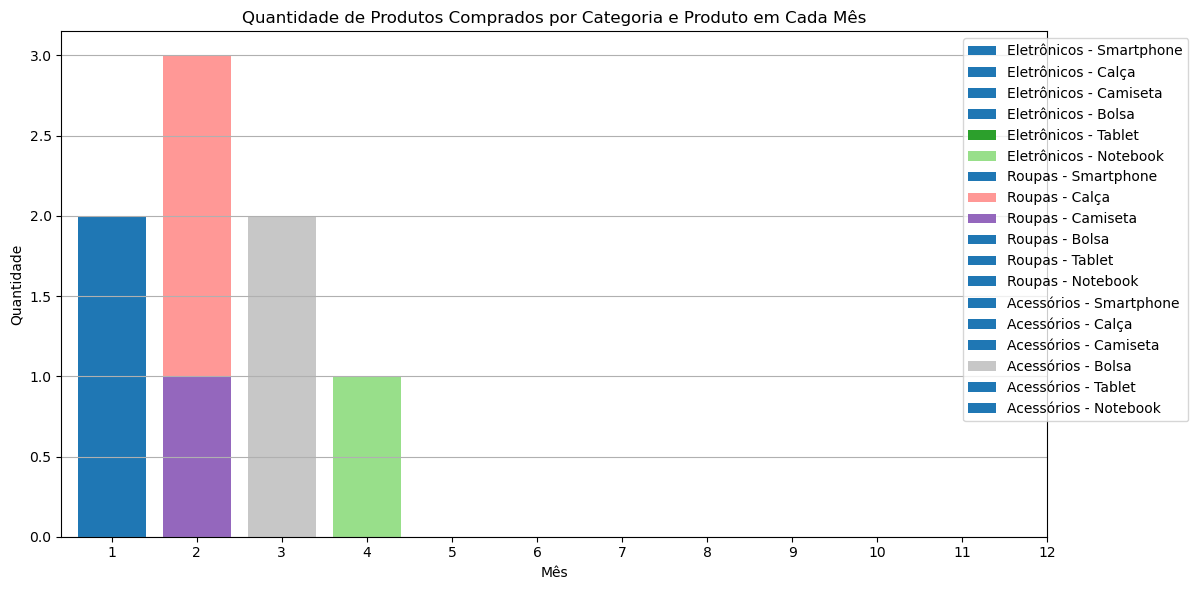

In [22]:
plt.figure(figsize=(12, 6))

categorias = grouped['categoria'].unique()
produtos = grouped['produto'].unique()
cores = plt.cm.tab20.colors

for i, cat in enumerate(categorias):
    for j, prod in enumerate(produtos):
        dados_combinacao = grouped[(grouped['categoria'] == cat) & (grouped['produto'] == prod)]
        plt.bar(dados_combinacao['data_compra'], dados_combinacao['quantidade'],
                color=cores[i * len(produtos) + j], label=f'{cat} - {prod}')

plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.title('Quantidade de Produtos Comprados por Categoria e Produto em Cada Mês')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(range(1, 13), [str(mes) for mes in range(1, 13)])
plt.grid(axis='y')
plt.tight_layout()
plt.show()
